In [8]:
%matplotlib inline

from sklearn import datasets
#from sklearn.cross_validation import train_test_split
# This module will be removed in 0.20.
# Use :func:`sklearn.model_selection.train_test_split` instead.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

import numpy as np

In [9]:
from matplotlib import style
from mylib.plotdregion import plot_decision_region

import matplotlib.pyplot as plt

style.use('seaborn-talk')

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.svm import SVC

In [12]:
from sklearn.linear_model import SGDClassifier

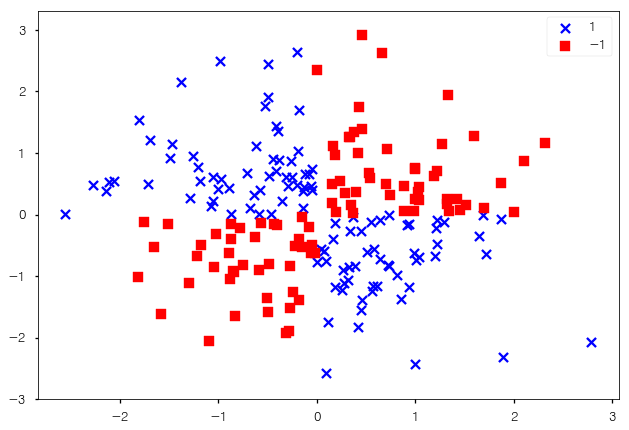

총 테스트 개수:60, 오류개수:7
정확도: 0.88


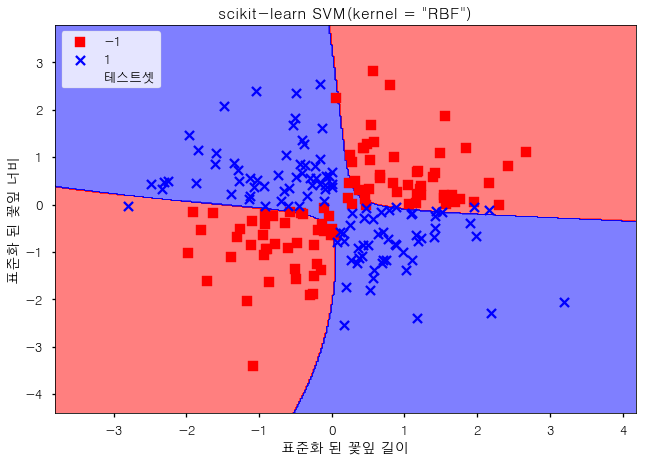

In [13]:
if __name__ == '__main__':
    
    X = np.random.randn(200, 2)
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
    y = np.where(y, 1, -1)

    plt.scatter(X[y==1, 0], X[y==1, 1], color='b', marker='x', label='1')
    plt.scatter(X[y==-1, 0], X[y==-1, 1], color='r', marker='s', label='-1')
    plt.ylim(-3.0)
    plt.legend()
    plt.show()
    
    # train_test_split는 원래 트레이닝 데이터와 결과값인 X와 y를 무작위로 섞은 후
    # test_size로 주어진 비율만큼 각각 배분함.
    # 예를 들어 test_size = 0.3으로 되어 있으면 X와 y를 무작위로 섞은 후에
    # 70%는 X_train과 y_train으로, 30%는 X_test, y_test로 둔다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    # StandardScaler()
    # : scikit-learn의 preprocessing 모듈이 제공하는 표준화를 적용하기 위한 클래스
    sc = StandardScaler()
    sc.fit(X_train) # X_train의 평균과 표준편차를 구함
    X_train_std = sc.transform(X_train) # 트레이닝 데이터를 표준화
    X_test_std = sc.transform(X_test) # 테스트 데이터를 표준화
    
    # Warning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. 
    # Use max_iter and tol instead
    # max_iter는 오류 발생함.
    # n_iter가 tol과 max_iter로 기능이 나뉘어 진 것으로 판단됨.
    # 하지만 n_iter의 기능을 그대로 가져오지는 않았음. 결과가 다름.
    # ml = Perceptron(eta0=0.01, n_iter=40, random_state=0)
    # ml = Perceptron(eta0=0.01, max_iter=40, random_state=0)
    # ml = Perceptron(eta0=0.01, tol=40, random_state=0)
    # 로지스틱 희귀(logistic regression) 코드
    # ml = LogisticRegression(C=1000.0, random_state=0)
    # SVM 코드
    # ml = SVC(kernel='linear', C=1.0, random_state=0)
    ml = SVC(kernel='rbf', C=10.0, gamma=0.10, random_state=0) # Radial Basic Function kernel(RBF 커널) -> 가우시안 커널이라고도 불린다.
    # 확률적 경사하강법
    # ml = SGDClassifier(loss='perceptron') # 확률적 경사하강법 적용 퍼셉트론
    # ml = SGDClassifier(loss='log')        # 확률적 경사하강법 적용 로지스틱 희귀
    # ml = SGDClassifier(loss='hinge')      # 확률적 경사하강법 적용 SVM
    ml.fit(X_train_std, y_train)
    
    # 퍼셉트론으로 머신러닝을 수행한 후 X_test_std를 이용해서 이에 대한 예측값을 계산힘.
    # 이 후 y_pred에 저장.
    y_pred = ml.predict(X_test_std)
    
    print('총 테스트 개수:%d, 오류개수:%d' %(len(y_test), (y_test != y_pred).sum()))
    print('정확도: %.2f' %accuracy_score(y_test, y_pred))
    
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    plot_decision_region(X=X_combined_std, y=y_combined, classifier=ml, test_idx=range(105, 150), title='scikit-learn SVM(kernel = "RBF")')
    